<a href="https://colab.research.google.com/github/2303A51528/PDS_1528/blob/main/assignment%202%2015aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

data = {
    "Order_ID": [101, 102, 103, 104, 105, 106],
    "Product": ["Laptop", "Mobile", "Laptop", "Headphones", "Mobile", "Tablet"],
    "Quantity": [2, 5, 1, 10, 3, 4],
    "Price": [50000, 15000, 52000, 2000, 16000, 18000]
}
df = pd.DataFrame(data)

df["Total_Sale"] = df["Quantity"] * df["Price"]
filtered_orders = df[df["Total_Sale"] > 1000]
most_sold = df.groupby("Product")["Quantity"].sum().idxmax()

def discount(sale):
    if sale > 50000:
        return 0.20 * sale
    elif sale > 20000:
        return 0.15 * sale
    elif sale > 10000:
        return 0.10 * sale
    else:
        return 0.05 * sale

df["Discount"] = df["Total_Sale"].apply(discount)

summary = df.groupby("Product").agg(
    Total_Quantity=("Quantity", "sum"),
    Total_Sales=("Total_Sale", "sum"),
    Total_Discount=("Discount", "sum")
)

print("=== Orders DataFrame ===")
print(df, "\n")

print("=== Filtered Orders (Total_Sale > 1000) ===")
print(filtered_orders, "\n")

print("=== Most Sold Product ===")
print(most_sold, "\n")

print("=== Summary by Product ===")
print(summary)



=== Orders DataFrame ===
   Order_ID     Product  Quantity  Price  Total_Sale  Discount
0       101      Laptop         2  50000      100000   20000.0
1       102      Mobile         5  15000       75000   15000.0
2       103      Laptop         1  52000       52000   10400.0
3       104  Headphones        10   2000       20000    2000.0
4       105      Mobile         3  16000       48000    7200.0
5       106      Tablet         4  18000       72000   14400.0 

=== Filtered Orders (Total_Sale > 1000) ===
   Order_ID     Product  Quantity  Price  Total_Sale
0       101      Laptop         2  50000      100000
1       102      Mobile         5  15000       75000
2       103      Laptop         1  52000       52000
3       104  Headphones        10   2000       20000
4       105      Mobile         3  16000       48000
5       106      Tablet         4  18000       72000 

=== Most Sold Product ===
Headphones 

=== Summary by Product ===
            Total_Quantity  Total_Sales  Total_Di

In [ ]:
'''2'''

=== Department Budget vs Actual Expenses ===
   Department  Budget  Expenses  Variance  Exceed_Budget
0          HR   50000     55000     -5000           True
1          IT  120000    110000     10000          False
2     Finance   80000     90000    -10000           True
3   Marketing   70000     65000      5000          False
4  Operations  100000    120000    -20000           True 

=== Departments Sorted by Variance ===
   Department  Budget  Expenses  Variance  Exceed_Budget
4  Operations  100000    120000    -20000           True
2     Finance   80000     90000    -10000           True
0          HR   50000     55000     -5000           True
3   Marketing   70000     65000      5000          False
1          IT  120000    110000     10000          False 

=== Departments Exceeding Budget ===
   Department  Budget  Expenses  Variance  Exceed_Budget
0          HR   50000     55000     -5000           True
2     Finance   80000     90000    -10000           True
4  Operations  10000

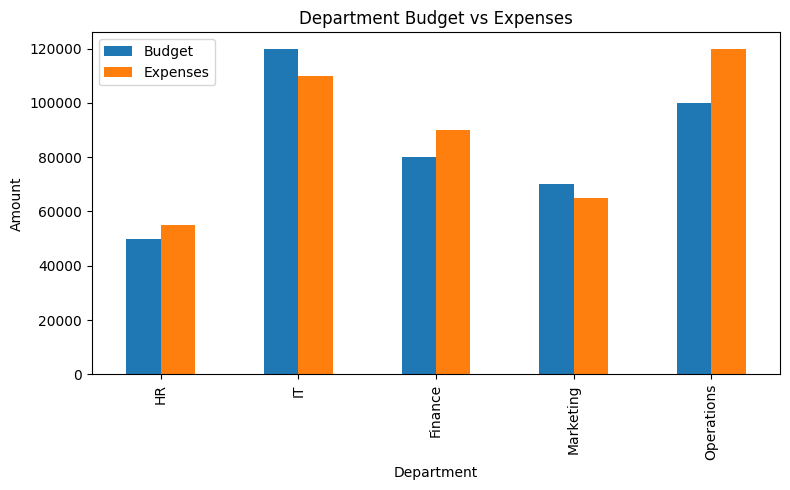

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

budget_data = {
    "Department": ["HR", "IT", "Finance", "Marketing", "Operations"],
    "Budget": [50000, 120000, 80000, 70000, 100000]
}
df_budget = pd.DataFrame(budget_data)

expenses_data = {
    "Department": ["HR", "IT", "Finance", "Marketing", "Operations"],
    "Expenses": [55000, 110000, 90000, 65000, 120000]
}
df_expenses = pd.DataFrame(expenses_data)

df = pd.merge(df_budget, df_expenses, on="Department")
df["Variance"] = df["Budget"] - df["Expenses"]
df["Exceed_Budget"] = df["Variance"] < 0
df_sorted = df.sort_values(by="Variance")

print("=== Department Budget vs Actual Expenses ===")
print(df, "\n")

print("=== Departments Sorted by Variance ===")
print(df_sorted, "\n")

print("=== Departments Exceeding Budget ===")
print(df[df["Exceed_Budget"]], "\n")

df.plot(x="Department", y=["Budget", "Expenses"], kind="bar", figsize=(8,5))
plt.title("Department Budget vs Expenses")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()
